In [1]:
%matplotlib inline 
import pandas as pd #dataframe
import numpy as np #numerical analysis
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting

#1. Acquire Data
df = pd.read_csv("https://raw.githubusercontent.com/ga-students/DAT-NYC-37/master/lessons/lesson-07/assets/dataset/bikeshare.csv")

#2. Preview Data
df.head() #helpful to see the top row/what is in your data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [2]:
len(df) #checking to see if values are missing with len + describe

17379

In [3]:
df.describe() #this works on numerical columns; means, std etc are not meaningful given categorical/other var type

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [4]:
#Checks:
## 1. Missing Values
## 2. Proper formatting/encoding (dates, numbers, etc. are as they should be)
### df.dtypes
## 3. Sanity: Do the values make sense? 
## 4. Extra/redundant columns
## 5. Correlation
## 6. Pay attention to temporality

# Remove:
# dteday
# count
# instant
# registered
## Why are we removing? to remove linear interdependence between our independent variables.

In [5]:
features = df.drop(['dteday', 'cnt', 'instant', 'registered', 'casual'], axis=1) #axis=0 refers to rows, axis=1 refers to columns
target = df['casual']

In [6]:
target

0         3
1         8
2         5
3         3
4         0
5         0
6         2
7         1
8         1
9         8
10       12
11       26
12       29
13       47
14       35
15       40
16       41
17       15
18        9
19        6
20       11
21        3
22       11
23       15
24        4
25        1
26        1
27        2
28        2
29        0
         ..
17349    12
17350    16
17351     9
17352     5
17353     6
17354    10
17355     4
17356     6
17357     3
17358     0
17359     0
17360     0
17361     0
17362     2
17363     9
17364    13
17365    33
17366    43
17367    52
17368    38
17369    62
17370    69
17371    30
17372    14
17373    10
17374    11
17375     8
17376     7
17377    13
17378    12
Name: casual, dtype: int64

In [7]:
features.head() #preview dataframe; easier than viewing entire dataset

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0


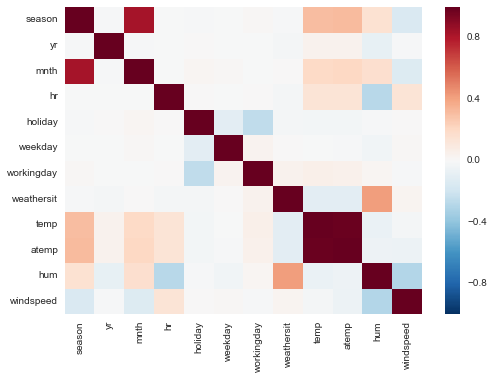

In [8]:
sns.heatmap(features.corr()); #displaying the correlation matrix

# TODO: remove temp or atemp; will regress in order to determine which is better

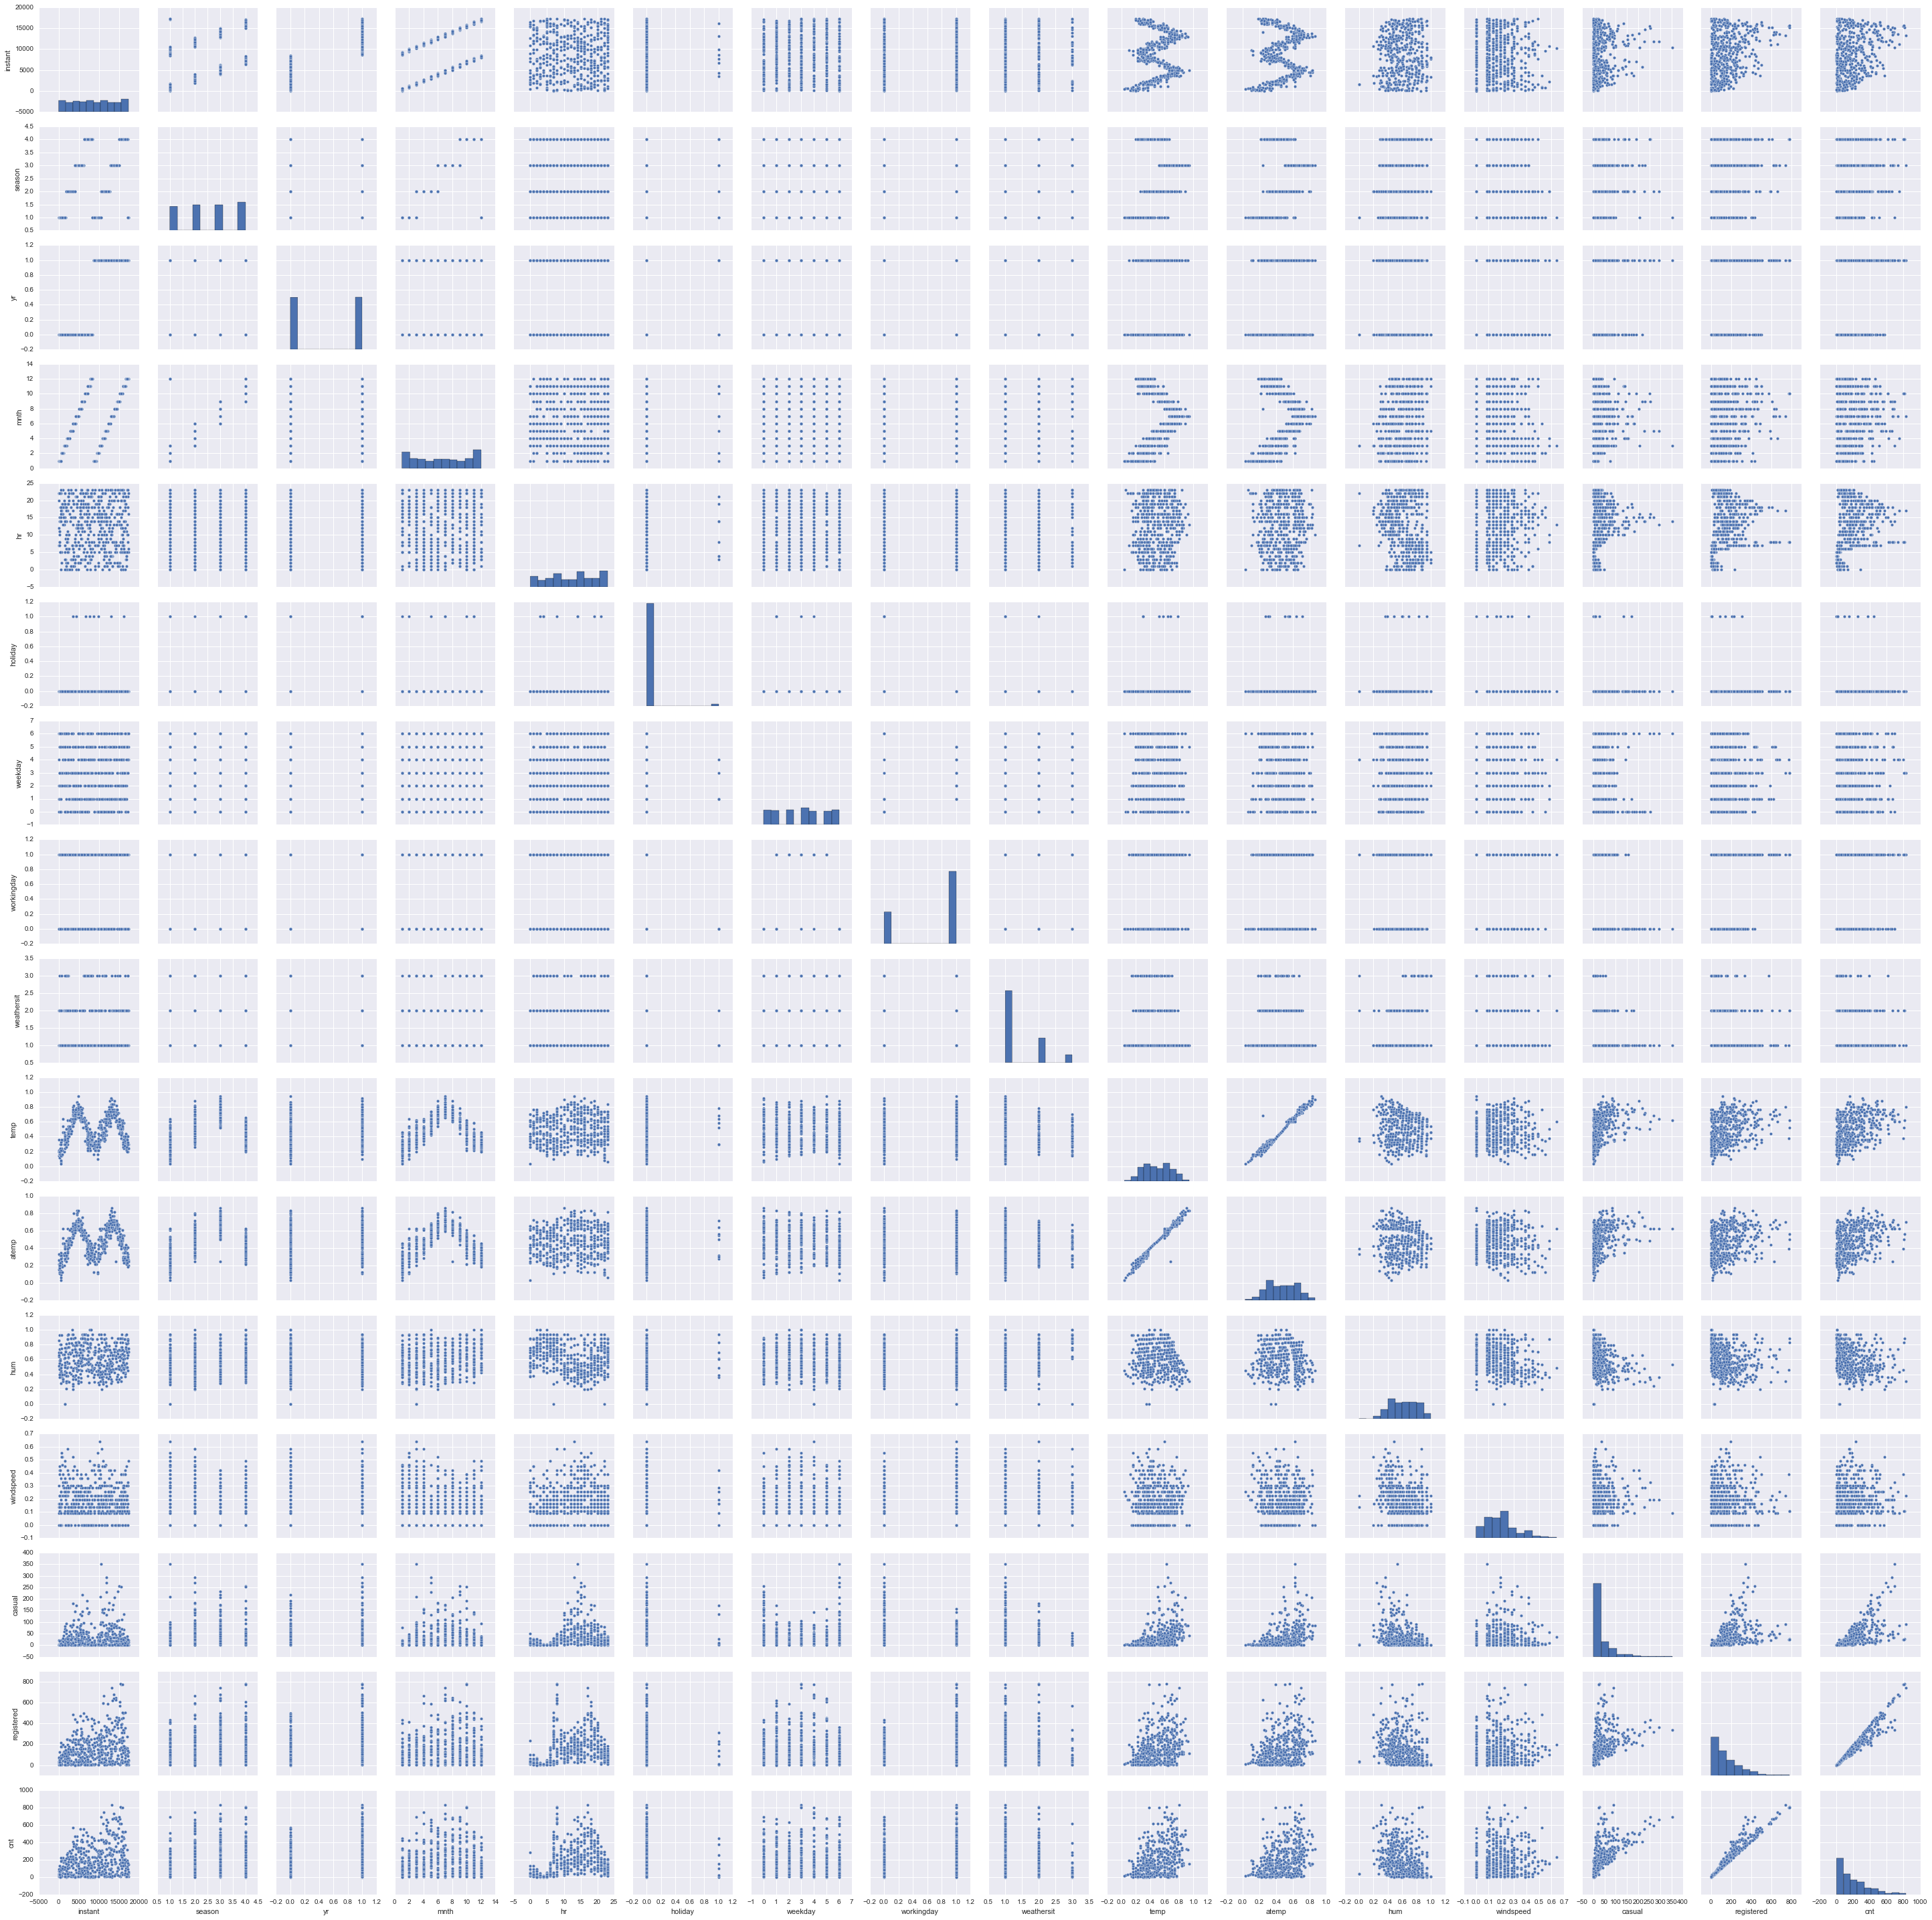

In [9]:
#use a sample of the data to prevent maxxing out cpu usage
sns.pairplot(df.sample(500))

_Plotting_:
- Categorical:
    - sns.violinPlot

In [10]:
#run analysis only on numerical columns:

df.select_dtypes(include=[np.number], exclude=None).head() #include/exclude must be listlike. np.number is type 'type'

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


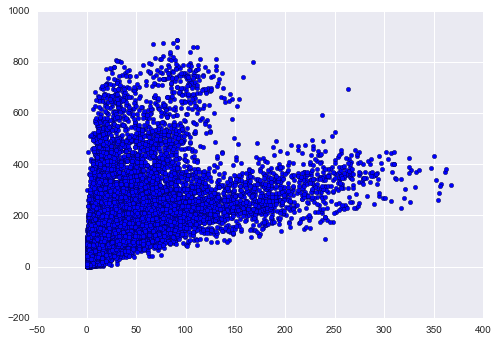

In [11]:
plt.scatter(df[['casual']], df[['registered']], alpha=1) #scatter plot of casual riders versus registered riders

#why the weird shape? 2 years of data. at the end of the year, casual riders converted to registered riders

In [12]:
import sklearn

from sklearn import feature_selection

X = features
y = target

[f_scores, p_values] = feature_selection.f_regression(X, y)

print X.columns
print f_scores
print p_values

Index([u'season', u'yr', u'mnth', u'hr', u'holiday', u'weekday', u'workingday',
       u'weathersit', u'temp', u'atemp', u'hum', u'windspeed'],
      dtype='object')
[  254.77187428   361.61421235    81.81904494  1733.77714111    17.32932038
    18.62534003  1730.49681544   414.45681105  4653.96520921  4513.59304836
  2379.21077431   142.81631746]
[  6.01115086e-57   8.09908774e-80   1.64546575e-19   0.00000000e+00
   3.15814032e-05   1.59971276e-05   0.00000000e+00   4.52501205e-91
   0.00000000e+00   0.00000000e+00   0.00000000e+00   8.66781628e-33]


In [13]:
non_encoded_features = pd.DataFrame({
        "columns": X.columns,
        "F Scores": f_scores,
        "P Values": p_values
    })

non_encoded_features
#from the output
#Candidate predictors (based on F scores):
#atemp
#hum
#hr

,F Scores,P Values,columns
0,254.771874,6.011151e-57,season
1,361.614212,8.099088e-80,yr
2,81.819045,1.645466e-19,mnth
3,1733.777141,0.000000e+00,hr
4,17.329320,3.158140e-05,holiday
5,18.625340,1.599713e-05,weekday
6,1730.496815,0.000000e+00,workingday
7,414.456811,4.525012e-91,weathersit
8,4653.965209,0.000000e+00,temp
9,4513.593048,0.000000e+00,atemp


In [14]:
from sklearn import linear_model

In [15]:
#1. Defined the model
model = linear_model.LinearRegression() #just picking out an algorithmic tool for analysis

#2. Fit the model
model.fit(X, y) #this is determining the feature vector; which variables used in analysis--determines betas

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
#the model object stores information about the regression model

#model.coef_
#providing the coefficients of the model

#model.intercept_
#providing the intercept of the model

#model.fit(X['atemp'], y) #sklearn cares about dimensionality; make sure x and y have same number of rows and at least 1 col

#test this with:
#print X['atemp'].shape
#print y.shape

#these need to match and needs to be a column vector

#to make this a column vector:
model.fit(X['atemp'][:, np.newaxis], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model.coef_

array([ 130.27875081])

In [18]:
model.score(X['atemp'][:, np.newaxis], y) #this displays our R^2; cheating because we tested on data we trained with

0.20618870573273862

In [19]:
model.fit(X[['atemp', 'hum']], y) #don't need to add a new axis, as the multiple regressors force multiple columns
model.score(X[['atemp', 'hum']], y) #R^2 is higher here

0.31109350969626981

In [20]:
model.fit(X[['atemp', 'hum', 'windspeed']], y)
model.score(X[['atemp', 'hum', 'windspeed']], y) 

0.31169809989650343

In [21]:
weekday_dummies = pd.get_dummies(X['weekday'], prefix='weekday')
weather_dummies = pd.get_dummies(X['weathersit'], prefix='weathersit')
season_dummies = pd.get_dummies(X['season'], prefix='season')
month_dummies = pd.get_dummies(X['mnth'], prefix='mnth')
hour_dummies = pd.get_dummies(X['hr'], prefix='hr')

X_dummy = pd.concat([
        X, 
        weekday_dummies,
        weather_dummies,
        season_dummies,
        month_dummies,
        hour_dummies],
        axis=1) #generating dummy variables

In [22]:
model.fit(X_dummy, y)
model.score(X_dummy, y) 

0.58968109898824139

In [23]:
model.coef_ #why are the coefficients so large?

array([ -1.73659609e+12,   1.19537354e+01,   1.66773166e+11,
        -1.11569919e+09,  -3.14803288e+12,  -1.90347242e+12,
        -3.14803288e+12,   4.76932094e+12,   7.31300049e+01,
         1.95184326e+01,  -2.87602539e+01,  -1.67392578e+01,
        -7.52103204e+12,  -2.46952674e+12,  -5.66054321e+11,
         1.33741810e+12,   3.24089052e+12,   5.14436294e+12,
         3.89980248e+12,   3.70670949e+12,  -1.06261145e+12,
        -5.83193238e+12,  -1.06012533e+13,   5.60378705e+12,
         7.34038314e+12,   9.07697923e+12,   1.08135753e+13,
         2.88580146e+12,   2.71902830e+12,   2.55225513e+12,
         2.38548196e+12,   2.21870880e+12,   2.05193563e+12,
         1.88516246e+12,   1.71838930e+12,   1.55161613e+12,
         1.38484296e+12,   1.21806980e+12,   1.05129663e+12,
        -7.44233290e+10,  -7.33076298e+10,  -7.21919306e+10,
        -7.10762314e+10,  -6.99605322e+10,  -6.88448330e+10,
        -6.77291338e+10,  -6.66134346e+10,  -6.54977354e+10,
        -6.43820362e+10,

season = season_1 + season_2 + season_3 + season_4
#### This will lead to an unsolveable solution

In [24]:
X_dummy[['season_1', 'season_2', 'season_3', 'season_4', 'season']].head()

,season_1,season_2,season_3,season_4,season
0,1.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,1


In [25]:
X_dummy.columns

Index([u'season', u'yr', u'mnth', u'hr', u'holiday', u'weekday', u'workingday',
       u'weathersit', u'temp', u'atemp', u'hum', u'windspeed', u'weekday_0',
       u'weekday_1', u'weekday_2', u'weekday_3', u'weekday_4', u'weekday_5',
       u'weekday_6', u'weathersit_1', u'weathersit_2', u'weathersit_3',
       u'weathersit_4', u'season_1', u'season_2', u'season_3', u'season_4',
       u'mnth_1', u'mnth_2', u'mnth_3', u'mnth_4', u'mnth_5', u'mnth_6',
       u'mnth_7', u'mnth_8', u'mnth_9', u'mnth_10', u'mnth_11', u'mnth_12',
       u'hr_0', u'hr_1', u'hr_2', u'hr_3', u'hr_4', u'hr_5', u'hr_6', u'hr_7',
       u'hr_8', u'hr_9', u'hr_10', u'hr_11', u'hr_12', u'hr_13', u'hr_14',
       u'hr_15', u'hr_16', u'hr_17', u'hr_18', u'hr_19', u'hr_20', u'hr_21',
       u'hr_22', u'hr_23'],
      dtype='object')